In [1]:
# Compare ContamPct estimate from kilosort with ISI violations estimate from Allen institute's pipeline

In [24]:
import altair as alt

In [25]:
import matplotlib.pyplot as plt

In [26]:
import scipy.stats
from pathlib import Path
from ecephys.units.io import get_cluster_info, create_phy_cluster_info

In [27]:
# isi violations refractory period = 2
ksdir_1 = Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX10-Charles/sleep-homeostasis-2h_imec1/ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1')
ksdir_1_5 = Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX10-Charles/sleep-homeostasis-2h_imec1/ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_1_5')
ksdir_2 = Path('/Volumes/scratch/neuropixels/data/tom/catgt/CNPIX10-Charles/sleep-homeostasis-2h_imec1/ks2_5_catgt_Th=12-10_lam=50_8s-batches_postpro_2_metrics_2')

In [28]:
create_phy_cluster_info(ksdir_1)
create_phy_cluster_info(ksdir_1_5)
create_phy_cluster_info(ksdir_2)


In [29]:
df_1 = get_cluster_info(ksdir_1)
df_1_5 = get_cluster_info(ksdir_1_5)
df_2 = get_cluster_info(ksdir_2)

In [30]:
df_1.replace([np.inf, -np.inf], 10000, inplace=True)
df_1_5.replace([np.inf, -np.inf], 10000, inplace=True)
df_2.replace([np.inf, -np.inf], 10000, inplace=True)

In [42]:
for df in [df_1, df_1_5, df_2]:
    df['ContamPct'] = df['ContamPct'].apply(lambda x: x if x < 100 else 100)

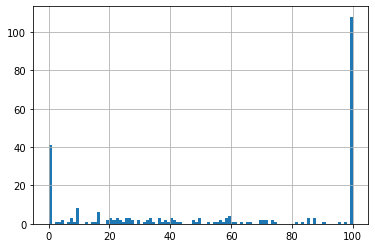

In [43]:
df_1.ContamPct.hist(bins=100)

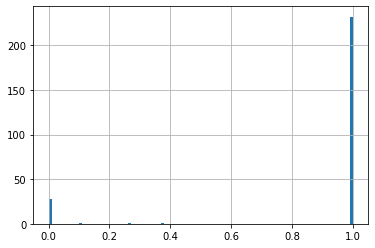

In [20]:
df.isi_viol.hist(bins=100)

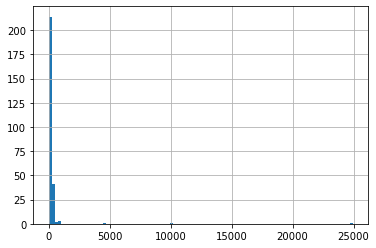

In [21]:
df.ContamPct.hist(bins=100)

In [45]:
alt.Chart(df_1).mark_point().encode(
    x = 'isi_viol',
    y = alt.Y(
        'ContamPct',
    ),
    color='group'
)

alt.Chart(...)

In [67]:
alt.Chart(
    df_2[df_2['fr'] >= 0.5]
).mark_point().encode(
    x = alt.X('isi_viol', bin=alt.Bin(maxbins=10)),
    y = alt.Y('ContamPct', bin=alt.Bin(maxbins=10)),
    size='count()'
)

alt.Chart(...)

In [59]:
alt.Chart(
    df_1[df_1['fr'] >= 0.5]
).mark_point().encode(
    x = alt.X('isi_viol', bin=True),
    y = alt.Y('ContamPct', bin=True),
    size='count()'
)

alt.Chart(...)

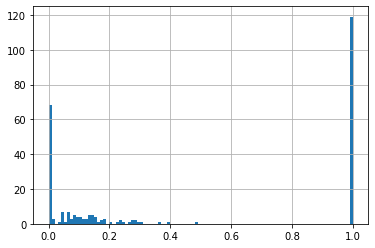

In [33]:
df_1.isi_viol.hist(bins=100)

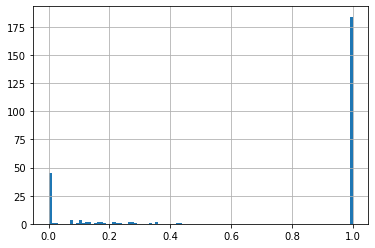

In [34]:
df_1_5.isi_viol.hist(bins=100)

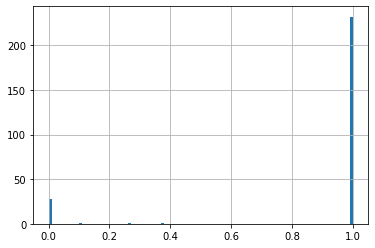

In [35]:
df_2.isi_viol.hist(bins=100)

In [36]:
scipy.stats.pearsonr(
    df_1.isi_viol,
    df_1_5.isi_viol,
)

(0.6413177045003444, 7.17937421118477e-32)

In [37]:
scipy.stats.pearsonr(
    df_1_5.isi_viol,
    df_2.isi_viol,
)

(0.612034627061232, 2.0116370954413937e-28)

In [38]:
scipy.stats.pearsonr(
    df_1.isi_viol,
    df_2.isi_viol,
)

(0.37829005699181856, 2.2550498799265273e-10)

In [46]:
scipy.stats.pearsonr(
    df_1.ContamPct,
    df_1.isi_viol,
)

(0.4900330476270758, 2.717695743342072e-17)

In [47]:
scipy.stats.pearsonr(
    df_1_5.ContamPct,
    df_1_5.isi_viol,
)

(0.6630885390766781, 1.0960199069683674e-34)

In [48]:
scipy.stats.pearsonr(
    df_2.ContamPct,
    df_2.isi_viol,
)

(0.3107844400589119, 2.6892972766901307e-07)

In [49]:
scipy.stats.spearmanr(
    df_2.ContamPct,
    df_2.isi_viol,
)

SpearmanrResult(correlation=0.3243642407394793, pvalue=7.388842681214595e-08)

In [50]:
scipy.stats.spearmanr(
    df_1.ContamPct,
    df_1.isi_viol,
)

SpearmanrResult(correlation=0.4694949396671918, pvalue=8.004530063245067e-16)

(0.0, 1000.0)

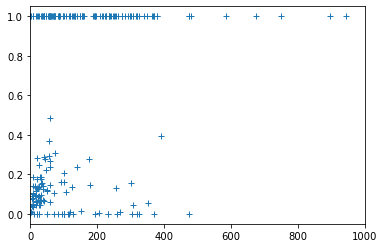

In [50]:
plt.plot(df_1.ContamPct, df.isi_viol, '+')
plt.xlim(0,1000)


(0.0, 1000.0)

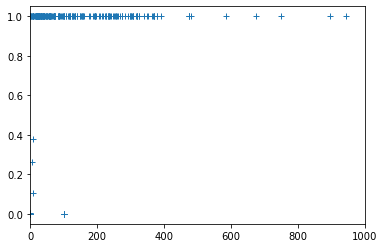

In [17]:
plt.plot(df.ContamPct, df.isi_viol, '+')
plt.xlim(0,1000)


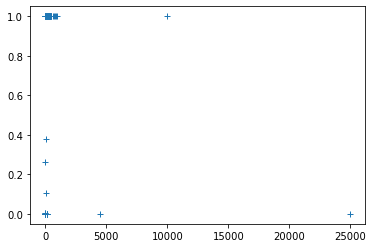

In [18]:
plt.plot(df.ContamPct, df.isi_viol, '+')
# plt.xlim(0,1000)
